In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/Users/ahmedmoataz/Documents/data_setes/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# check for missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# replace missing values with 0
df_filled = df.fillna(0)

In [6]:
# Data Types of The columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# changing the data type 

df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['votes'] =pd.to_numeric(df['votes'], errors='coerce')

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [10]:
# create a correct year column

df['year_correct'] = df['released'].str.extract(r'(\d{4})')


In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [12]:
# sort data by the gross

df = df.sort_values(by=['gross'], inplace=False , ascending=False)

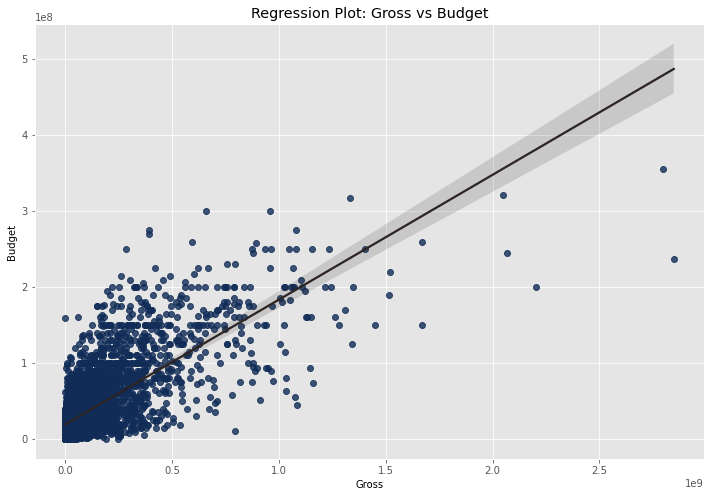

In [13]:
# Create the regression plot 
sns.regplot(x="gross", y="budget", data=df, color='#102C57', line_kws={"color": "#2D2424"})

plt.xlabel('Gross')
plt.ylabel('Budget')
plt.title('Regression Plot: Gross vs Budget')

plt.show()


In [14]:
# looking at correlations

In [15]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


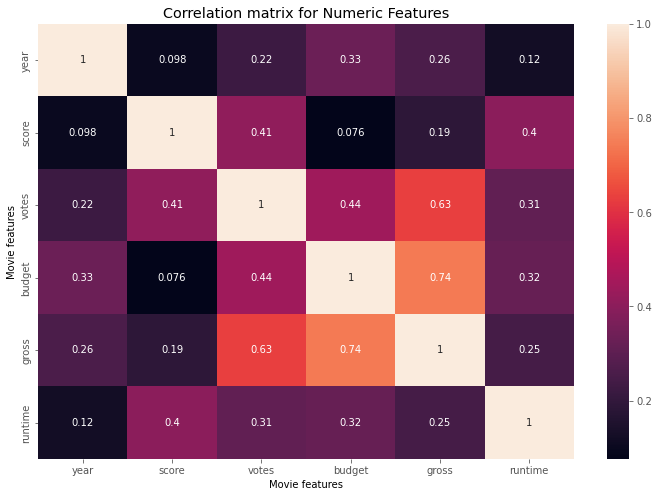

In [16]:
# correlaiton matrix for numeric features
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

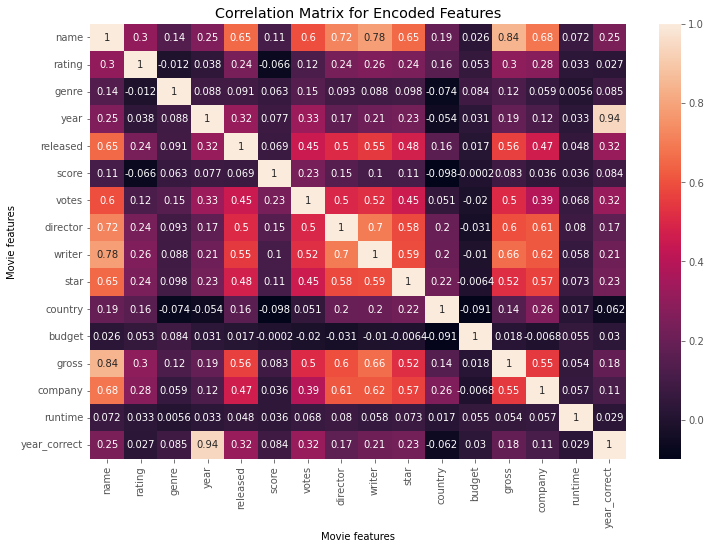

In [17]:
# correlaiton matrix for Encoded Features

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Encoded Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [18]:
# Calculate the correlation matrix after encoding categorical variables
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

# Unstack the correlation matrix to create a Series of correlation pairs
corr_pairs = correlation_mat.unstack()

corr_pairs.head()


name  name        1.000000
      rating      0.303922
      genre       0.138277
      year        0.253700
      released    0.654899
dtype: float64

In [19]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs.head()

score    country   -0.098456
country  score     -0.098456
budget   country   -0.091056
country  budget    -0.091056
genre    country   -0.073886
dtype: float64

In [20]:
# high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

strong_pairs.head()

director  released    0.502859
released  director    0.502859
gross     votes       0.504208
votes     gross       0.504208
star      gross       0.516135
dtype: float64

In [21]:
# We can see that votes and budget have the highest correlation to gross earnings
# Company has a low correlation

In [22]:
# Looking at companies 

In [23]:
#Top 15 Companies by Total Gross Revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending=False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')


CompanyGrossSumSorted


company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [24]:
# Top 15 Companies by Gross Revenue 2011-2019

CompanyGrossSum = df.groupby(['company', 'year_correct'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year_correct'], ascending=False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted


company                year_correct
Walt Disney Pictures   2019            5773131804
Marvel Studios         2018            4018631866
Universal Pictures     2015            3834354888
Twentieth Century Fox  2009            3793491246
Walt Disney Pictures   2017            3789382071
Paramount Pictures     2011            3565705182
Warner Bros.           2010            3300479986
                       2011            3168551343
Walt Disney Pictures   2010            3104474158
Paramount Pictures     2014            3071298586
Columbia Pictures      2019            2932757449
                       2006            2918469353
Marvel Studios         2019            2797501328
Warner Bros.           2018            2774168962
                       2005            2773019821
Name: gross, dtype: int64

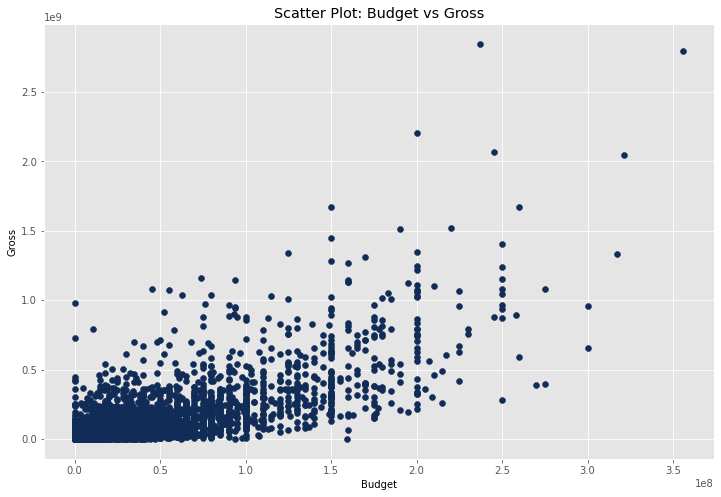

In [25]:
# scatter plot with budget vs gross

plt.scatter(x=df_filled['budget'], y=df_filled['gross'], color='#102C57')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Scatter Plot: Budget vs Gross')

plt.show()